In [4]:
import pandas as pd
import os
# import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv(os.getcwd()[0:-11] + "\\Cleansed_data\\Cleaned_2\\cleaned_data.csv")

In [7]:
df.head(200)

,ad_id,result,job_field,position_category,position,education_level,work_time,vacancies,salary,city,institution,workplace,department,institution_address,responsibilities,requirements,nice_to_have,date_announced,views
0,130994,1,vet,mid,inspektor weterynaryjny,3,0.5,1,nie podano wynagrodzenia,Olesno,Powiatowy Inspektorat Weterynarii w Oleśnie,Olesno,"w Zespole ds. bezpieczeństwa żywności, pasz i ...",ul. Kossaka 5 46-300 Olesno,Sprawuje nadzór nad działalnością TPDW w zakre...,doświadczenie zawodowe: co najmniej 6 miesięcy...,Przeszkolenie w zakiesie pobierania prób.|-|Zn...,2023-12-02,183.0
1,130970,0,tech/construction,senior,starszy specjalista,3,1.0,1,nie podano wynagrodzenia,Bydgoszcz,Wojewódzki Inspektorat Nadzoru Budowlanego w B...,Bydgoszcz woj. kujawsko-pomorskie,w Wydziale Wyrobów Budowlanych,Ul. Zygmunta Augusta 16 85-082 Bydgoszcz,udział w przygotowaniu i prowadzeniu działań i...,znajomość przepisów w zakresie ustaw: Ustawa o...,doświadczenie zawodowe: w budownictwie i/lub a...,2023-12-01,296.0
2,130898,1,vet,assistent,asystent,2,1.0,1,"4400,00 zł brutto",Chrzanów,Powiatowy Inspektorat Weterynarii w Chrzanowie,Chrzanów,w zespole ds. administracyjnych,Mjr Grzybowskiego 7 32-500 Chrzanów,"Przyjmuje i ewidencjonuje korespondencję, przy...",Prawo jazdy kat. B|-|Umiejętność obsługi kompu...,Wykształcenie: wyższe ekonomiczne lub administ...,2023-11-30,701.0
3,130919,0,uniformed services,expert,specjalista,4,1.0,1,"4940,34 zł brutto",Warszawa,Komenda Stołeczna Policji w Warszawie,Warszawa,w Wydziale Teleinformatyki,Ul. Nowolipie 2 00-150 Warszawa,Analizuje i opiniuje pod względem zasadności z...,doświadczenie zawodowe: : powyżej 1 roku w obs...,Wykształcenie: wyższe : ekonomiczne |-|doświad...,2023-11-30,456.0
4,130837,1,vet,mid,inspektor weterynaryjny,3,1.0,1,nie podano wynagrodzenia,Świdnica,Powiatowy Inspektorat Weterynarii w Świdnicy,Świdnica,Zespół ds. zdrowia i ochrony zwierząt,ul. Wałbrzyska 25-27 58-100 Świdnica,wykonuje czynności z zakresu zwalczania chorób...,prawo wykonywania zawodu lekarza weterynarii|-...,czynne prawo jazdy kat. B,2023-11-29,228.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,129991,0,law,mid,inspektor,1,1.0,1,"nie mniej niż 4803,66 zł brutto",Świnoujście,Morski Oddział Straży Granicznej w Gdańsku,"Świnoujście ul. Grodzka 4, 72-600 Świnoujście",w Zespole Techniki i Zaopatrzenia,ul. Oliwska 35 80-563 Gdańsk,Nadzoruje roboty budowlane wykonywane systemem...,doświadczenie zawodowe: co najmniej 2 lata w b...,doświadczenie zawodowe: co najmniej 2 lata w k...,2023-11-13,297.0
196,129992,1,documents,mid,referent,2,1.0,2,"4989,85 zł brutto",Gdynia,Izba Administracji Skarbowej w Gdańsku,Gdynia PUCS w Gdyni ul. Północna 9A 81-029 Gdynia,w Dziesiątym Dziale Kontroli Celno-Skarbowej i...,ul. Długa 75/76 80-831 Gdańsk,Prowadzi kontrole celno-skarbowe|-|Prowadzi po...,Znajomość przepisów prawa proceduralnego (Ordy...,CV i list motywacyjny|-|Kopie dokumentów potwi...,2023-11-13,1110.0
197,129998,0,tech/construction,expert,specjalista,4,1.0,1,nie podano wynagrodzenia,Warszawa,Główny Urząd Nadzoru Budowlanego w Warszawie,Warszawa,w Departamencie Inspekcji i Kontroli Budowlanej,Krucza 38/42 00-926 Warszawa,prowadzi kontrole terenowych organów administr...,doświadczenie zawodowe: co najmniej 1 rok w ad...,"Wykształcenie: wyższe prawnicze, administracyj...",2023-11-13,435.0
198,129999,0,law,senior,starszy inspektor,4,1.0,1,nie podano wynagrodzenia,Warszawa,Główny Urząd Nadzoru Budowlanego w Warszawie,Warszawa,w Departamencie Inspekcji i Kontroli Budowlanej,Krucza 38/42 00-926 Warszawa,prowadzi kontrole terenowych organów administr...,"znajomość przepisów: ustawy - Prawo budowlane,...","Wykształcenie: wyższe prawnicze, administracyj...",2023-11-13,405.0


In [3]:
# Splitting data into 2 categories.
df_failure = df.loc[df["result"]==0]
df_success = df.loc[df["result"]==1]

# Putting frequencies and means into variables.
count_success = len(df_success)
count_failure = len(df_failure)
print(f"Success ads: {count_success}" + '\n' + f"Failure ads: {count_failure}")

Success ads: 58658
Failure ads: 42182


## Grouping by

### Generalised EDA (non-time-series)

In [25]:
# Putting frequencies and means into variables.
count_success = len(df_success)
count_failure = len(df_failure)

# Frequency of education levels.
education_success = (df_success.groupby(['education_level']).size()/count_success).reset_index(name='frequency')
education_failure = (df_failure.groupby(['education_level']).size()/count_failure).reset_index(name='frequency')

# Frequency of job fields.
job_fields_success = (df_success.groupby(['job_field']).size()/count_success).reset_index(name='frequency')
job_fields_failure = (df_failure.groupby(['job_field']).size()/count_failure).reset_index(name='frequency')

# Frequency of position levels.
position_levels_success = (df_success.groupby(['position_category']).size()/count_success).reset_index(name='frequency')
position_levels_failure = (df_failure.groupby(['position_category']).size()/count_failure).reset_index(name='frequency')

# Median of views.
median_views_success = df_success["views"].median()
median_views_failure = df_failure["views"].median()

# Mean of work time and counts for group by.
avg_worktime_success = df_success["work_time"].mean()
avg_worktime_failure = df_failure["work_time"].mean()

worktime_group_count_success = (df_success.groupby(["work_time"]).size()/count_success).reset_index(name='frequency')
worktime_group_count_failure = (df_failure.groupby(["work_time"]).size()/count_failure).reset_index(name='frequency')

# Frequency of 'salary not disclosed'.
no_salary_success = len(df_success["salary"].loc[df_success["salary"] == "nie podano wynagrodzenia"])/count_success
no_salary_failure = len(df_failure["salary"].loc[df_failure["salary"] == "nie podano wynagrodzenia"])/count_failure

# Counts for vacancies group by.
vacancies_success = (df_success.groupby(["vacancies"]).size()/count_success).reset_index(name='frequency')
vacancies_failure = (df_failure.groupby(["vacancies"]).size()/count_failure).reset_index(name='frequency')

# Average length of responsibilities description.
avg_responsibility_len_success = df_success['responsibilities'].str.len().mean()
avg_responsibility_len_failure = df_failure['responsibilities'].str.len().mean()

# Average length of necessary requirements description.
avg_req_len_success = df_success['requirements'].str.len().mean()
avg_req_len_failure = df_failure['requirements'].str.len().mean()

# 
# institution_group_count = (df.groupby(["institution"])["result"].agg(mean()).reset_index(name='frequency')
                           
result_group_stats = df.groupby("institution").agg(
    frequency=('result', 'size'),
    mean_score=('result', 'mean')
).reset_index()

In [26]:
result_group_stats

,institution,frequency,mean_score
0,Archiwum Akt Nowych w Warszawie,117,0.743590
1,Archiwum Główne Akt Dawnych w Warszawie,33,0.666667
2,Archiwum Narodowe w Krakowie,11,1.000000
3,Archiwum Państwowe w Białymstoku,7,1.000000
4,Archiwum Państwowe w Bydgoszczy,37,0.729730
...,...,...,...
1661,Zakład Emerytalno-Rentowy MSWiA w Warszawie,248,0.560484
1662,Łódzki Urząd Wojewódzki w Łodzi,1355,0.405904
1663,Śląski Oddział Straży Granicznej w Raciborzu,166,0.421687
1664,Śląski Urząd Wojewódzki w Katowicach,817,0.449204


### EDA for time-series

In [74]:
# I want to group by year and month.
df['date_announced'] = pd.to_datetime(df['date_announced']).dt.to_period('Y')

# Splitting data into 2 categories.
df_failure = df.loc[df["result"]==0]
df_success = df.loc[df["result"]==1]

# Putting frequencies and means into variables.
count_success = len(df_success)
count_failure = len(df_failure)

# Frequency of education levels.
education_success = (df_success.groupby(['education_level', 'date_announced']).size()/count_success).reset_index(name='frequency')
education_failure = (df_failure.groupby(['education_level', 'date_announced']).size()/count_failure).reset_index(name='frequency')

# Frequency of job fields.
job_fields_success = (df_success.groupby(['job_field', 'date_announced']).size()/count_success).reset_index(name='frequency')
job_fields_failure = (df_failure.groupby(['job_field', 'date_announced']).size()/count_failure).reset_index(name='frequency')

# Frequency of position levels.
position_levels_success = (df_success.groupby(['position_category', 'date_announced']).size()/count_success).reset_index(name='frequency')
position_levels_failure = (df_failure.groupby(['position_category', 'date_announced']).size()/count_failure).reset_index(name='frequency')

# Median of views.
median_views_success = df_success["views"].median()
median_views_failure = df_failure["views"].median()

# Mean of work time and counts for group by.
avg_worktime_success = df_success["work_time"].mean()
avg_worktime_failure = df_failure["work_time"].mean()

worktime_group_count_success = (df_success.groupby(["work_time", "date_announced"]).size()/count_success).reset_index(name='frequency')
worktime_group_count_failure = (df_failure.groupby(["work_time", "date_announced"]).size()/count_failure).reset_index(name='frequency')

# Frequency of 'salary not disclosed'.
no_salary_success = len(df_success["salary"].loc[df_success["salary"] == "nie podano wynagrodzenia"])/count_success
no_salary_failure = len(df_failure["salary"].loc[df_failure["salary"] == "nie podano wynagrodzenia"])/count_failure

# Counts for vacancies group by.
vacancies_success = (df_success.groupby(["vacancies", "date_announced"]).size()/count_success).reset_index(name='frequency')
vacancies_failure = (df_failure.groupby(["vacancies"]).size()/count_failure).reset_index(name='frequency')

# Average length of responsibilities description.
avg_responsibility_len_success = df_success['responsibilities'].str.len().mean()
avg_responsibility_len_failure = df_failure['responsibilities'].str.len().mean()

# Average length of necessary requirements description.
avg_req_len_success = df_success['requirements'].str.len().mean()
avg_req_len_failure = df_failure['requirements'].str.len().mean()### Plotting charts

In [11]:
# A function creating a grouped bar chart displaying differences between classes, for given arguments.
# Based on an example from the Matplotlib documentation:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

def display_grouped_bar_chart(x_labels:tuple, success_attributes:tuple, failure_attributes:tuple, xlabel:str, ylabel:str, title:str, upper_y_value:float, placement:str, chart_width:int):
    
    attributes = {
        'Success': success_attributes,
        'Failure': failure_attributes
    }
    
    x = np.arange(len(x_labels))  # the label locations
    bar_width = 0.25  # the width of the bars
    multiplier = 0
    
    fig, ax = plt.subplots(layout='constrained')
    fig.set_figwidth(chart_width)
    
    for trait_label, value in attributes.items():
        offset = bar_width * multiplier
        rects = ax.bar(x + offset, value, bar_width, label=trait_label)
        ax.bar_label(rects, padding=3)
        multiplier += 1
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x + bar_width, x_labels)
    ax.legend(loc=placement, ncols=2)
    ax.set_ylim(0, upper_y_value)
    
    plt.show()

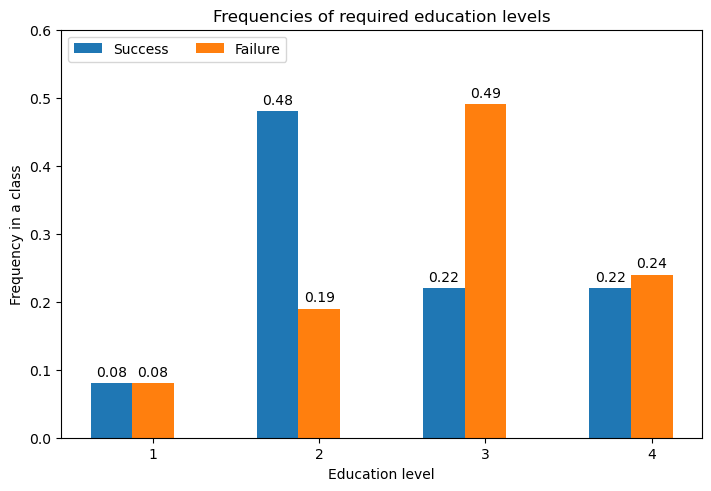

In [47]:
# Required education level comparison.

# Rounding numbers for more clarity in the chart.
rounded_ed_success_values = []
rounded_ed_failure_values = []

for number in education_success["frequency"].values:
    rounded_ed_success_values.append(round(number, 2))
for number in education_failure["frequency"].values:
    rounded_ed_failure_values.append(round(number, 2))

display_grouped_bar_chart(
    ('1', '2', '3', '4'), rounded_ed_success_values,
    rounded_ed_failure_values, 'Education level',
    'Frequency in a class', 'Frequencies of required education levels', 0.60, placement='upper left',
    chart_width=7
)

TypeError: unhashable type: 'numpy.ndarray'

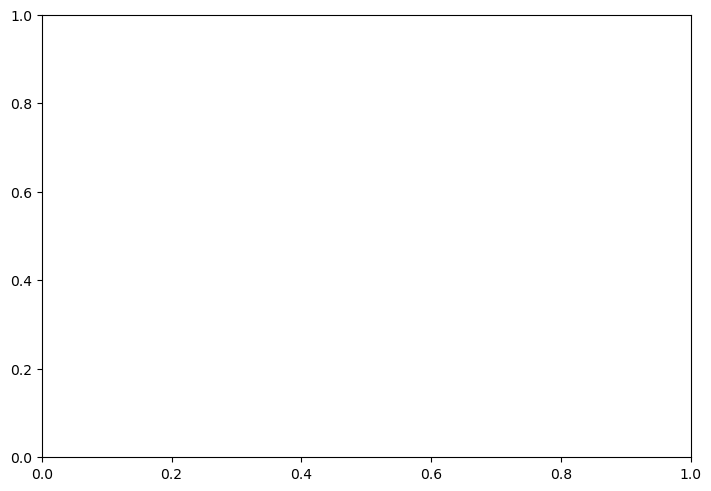

In [12]:
display_grouped_bar_chart(
    df["institution"].unique(), institution_group_count_success,
    institution_group_count_failure, 'institution',
    'Frequency in a class', 'Frequencies of required education levels', 0.60, placement='upper left',
    chart_width=7
)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (11,) and arg 1 with shape (28,).

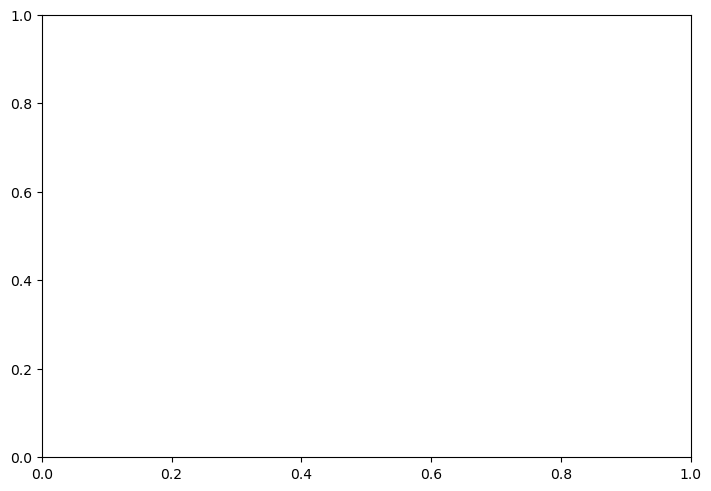

In [83]:
# Required education level comparison.

# Rounding numbers for more clarity in the chart.
rounded_ed_success_values = []
rounded_ed_failure_values = []

for number in education_success["frequency"].values:
    rounded_ed_success_values.append(round(number, 2))
for number in education_failure["frequency"].values:
    rounded_ed_failure_values.append(round(number, 2))

display_grouped_bar_chart(
    pd.unique(pd.concat([education_success['date_announced'], education_success["education_level"]]).values.ravel('K')), rounded_ed_success_values,
    rounded_ed_failure_values, 'Education level',
    'Frequency in a class', 'Frequencies of required education levels', 0.60, placement='upper left',
    chart_width=7
)

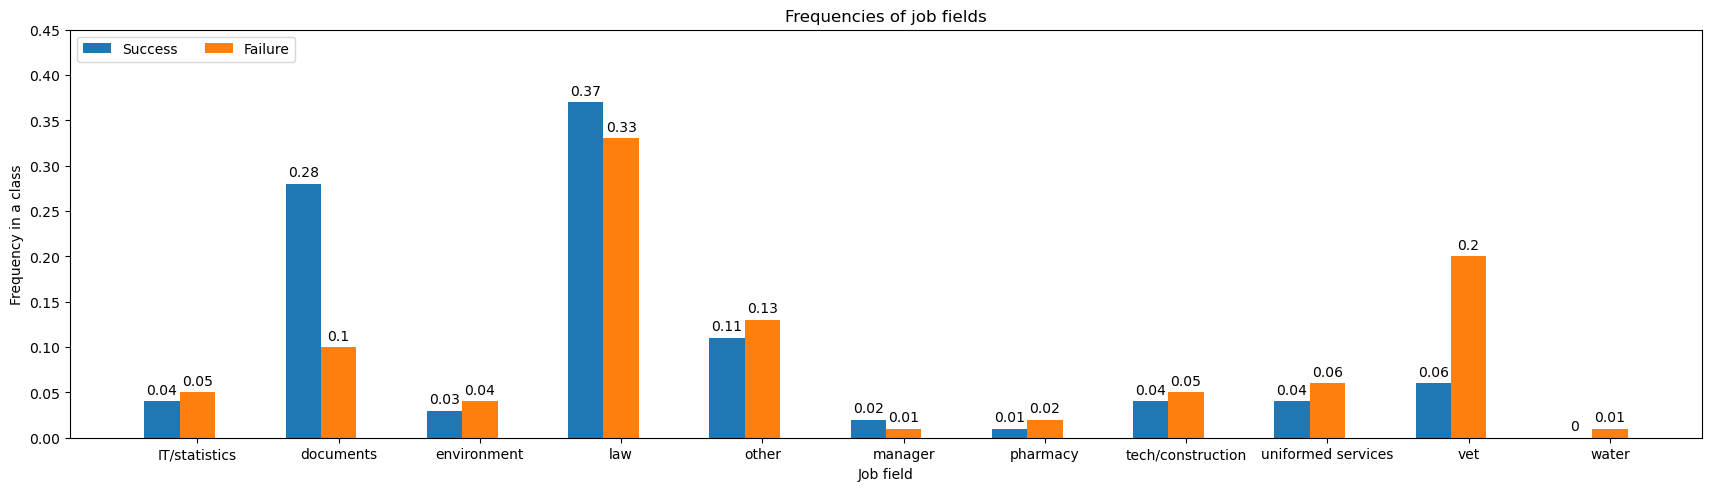

In [79]:
# Frequencies for various job fields.

# Rounding numbers for more clarity in the chart.
rounded_field_success_values = []
rounded_field_failure_values = []

for number in job_fields_success["frequency"].values:
    rounded_field_success_values.append(round(number, 2))
for number in job_fields_failure["frequency"].values:
    rounded_field_failure_values.append(round(number, 2))

display_grouped_bar_chart(
    ('IT/statistics', 'documents', 'environment', 'law', 'other', 'manager', 'pharmacy', 'tech/construction', 'uniformed services', 'vet', 'water'), rounded_field_success_values,
    rounded_field_failure_values, 'Job field',
    'Frequency in a class', 'Frequencies of job fields', 0.45, placement='upper left', chart_width=17
)

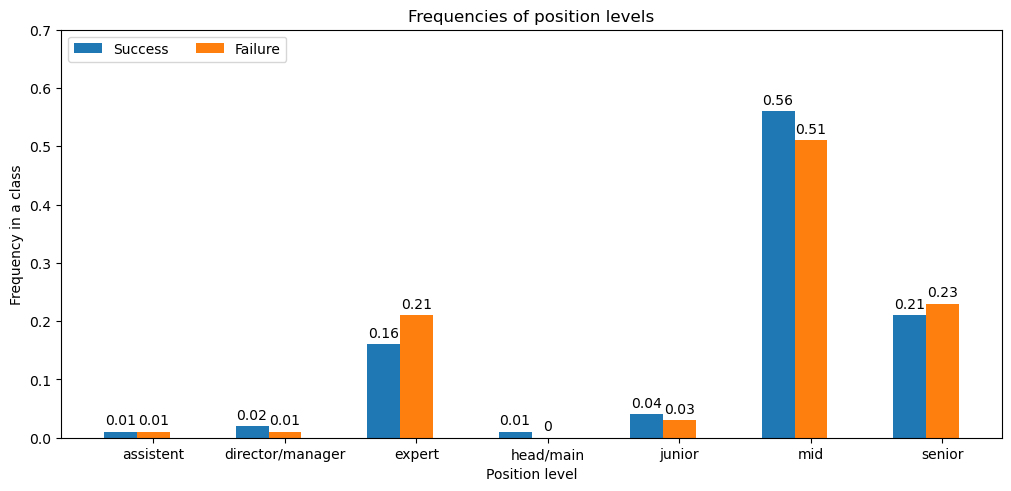

In [75]:
# Frequencies for position levels (junior, senior, etc.)

# Rounding numbers for more clarity in the chart.
rounded_position_levels_success_values = []
rounded_position_levels_failure_values = []

for number in position_levels_success["frequency"].values:
    rounded_position_levels_success_values.append(round(number, 2))
for number in position_levels_failure["frequency"].values:
    rounded_position_levels_failure_values.append(round(number, 2))

display_grouped_bar_chart(
    ('assistent', 'director/manager', 'expert', 'head/main', 'junior', 'mid', 'senior'), rounded_position_levels_success_values,
    rounded_position_levels_failure_values, 'Position level',
    'Frequency in a class', 'Frequencies of position levels', 0.70, placement='upper left', chart_width=10
)

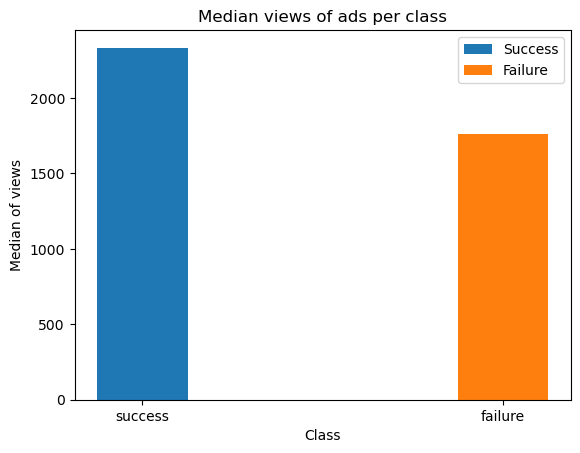

In [53]:
# Median views on the website.

width = 0.25
plt.bar('success', median_views_success, width)
plt.bar('failure', median_views_failure, width)

plt.title('Median views of ads per class')
plt.xlabel('Class')
plt.ylabel('Median of views')
plt.legend(['Success', 'Failure'])

plt.show()

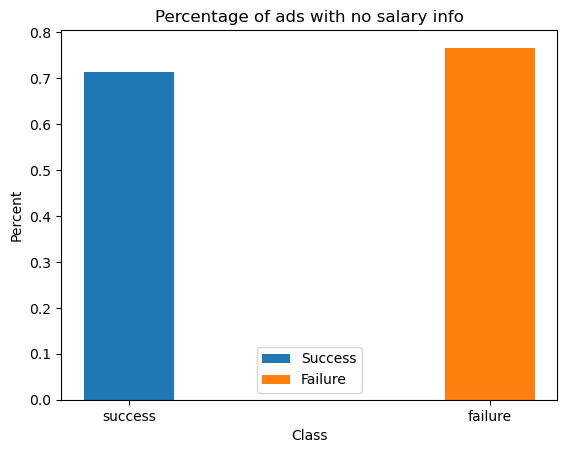

In [54]:
# Ads with no salary info given (percentage).

width = 0.25
plt.bar('success', no_salary_success, width)
plt.bar('failure', no_salary_failure, width)

plt.title('Percentage of ads with no salary info')
plt.xlabel('Class')
plt.ylabel('Percent')
plt.legend(['Success', 'Failure'])

plt.show()

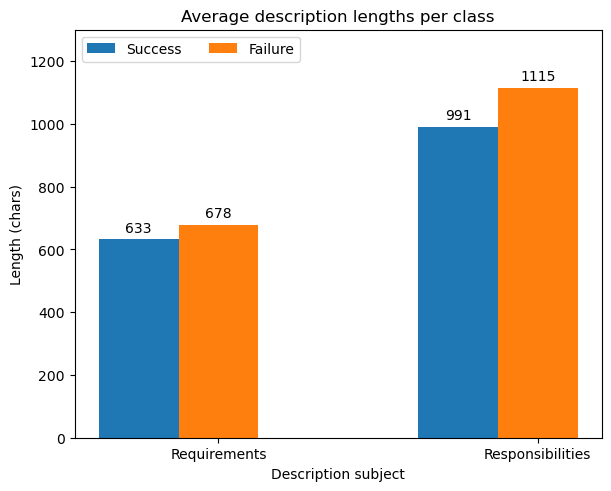

In [57]:
# Average length (characters) of requirements description per ad.

display_grouped_bar_chart(
    ('Requirements', 'Responsibilities'), (round(avg_req_len_success,0), round(avg_responsibility_len_success,0)), (round(avg_req_len_failure,0), round(avg_responsibility_len_failure,0)), 'Description subject',
    'Length (chars)', 'Average description lengths per class', 1300, placement='upper left', chart_width=6
)

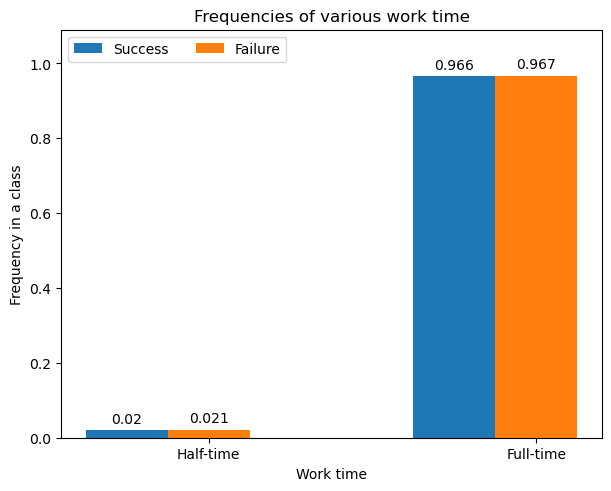

In [85]:
# Part of full-time frequency.

# Visualising only half-time and full-time proportions, since they're substantially more frequent than other groups in both classes.
# Other proportions, due to small number of ads they appear in, seem to be insignificant.
worktime_group_count_success_for_chart = worktime_group_count_success.loc[(worktime_group_count_success['work_time']==1.0) | (worktime_group_count_success['work_time']==0.5)]
worktime_group_count_failure_for_chart = worktime_group_count_failure.loc[(worktime_group_count_failure['work_time']==1.0) | (worktime_group_count_failure['work_time']==0.5)]

# Rounding numbers.
rounded_worktime_success_values = []
rounded_worktime_failure_values = []

for number in worktime_group_count_success_for_chart["frequency"].values:
    rounded_worktime_success_values.append(round(number, 3))
for number in worktime_group_count_failure_for_chart["frequency"].values:
    rounded_worktime_failure_values.append(round(number, 3))

display_grouped_bar_chart(
    ('Half-time', 'Full-time'), rounded_worktime_success_values, rounded_worktime_failure_values, 'Work time', 'Frequency in a class', 'Frequencies of various work time', 1.09, placement='upper left', chart_width=6
)

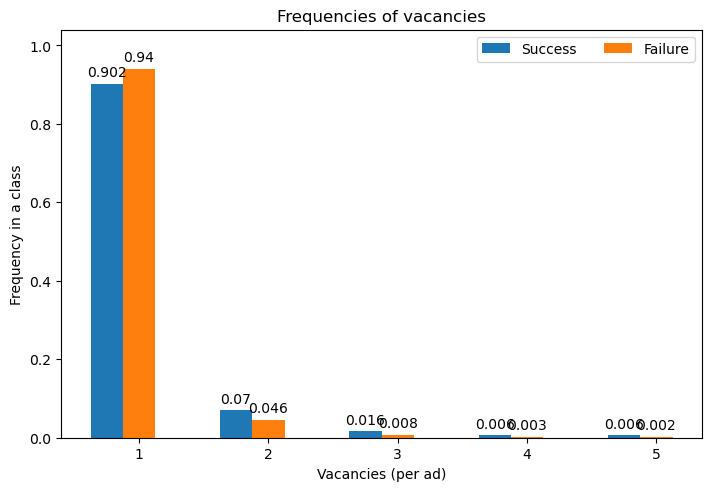

In [87]:
# Frequencies of the number of vacancies (per ad) for both classes.

# Rounding numbers.
rounded_vacancies_success_values = []
rounded_vacancies_failure_values = []

for number in vacancies_success["frequency"].values:
    rounded_vacancies_success_values.append(round(number, 3))
for number in vacancies_failure["frequency"].values:
    rounded_vacancies_failure_values.append(round(number, 3))

display_grouped_bar_chart(
    ('1', '2', '3', '4', '5'), rounded_vacancies_success_values, rounded_vacancies_failure_values, 'Vacancies (per ad)', 'Frequency in a class', 'Frequencies of vacancies', 1.04, placement='upper right', chart_width=7
)